## DataFrame创建

In [ ]:
import pandas  as pd

df=df = pd.DataFrame(data={"id": [101, 102, 103,101], "name": ["张三", "李四", "王五",'张三'], "age": [20, 30, 40,15]},index=["aa", "bb", "cc",'ac'])
df


In [ ]:
# print(df.values)
# print(df.columns)
# print(df.T)
# df.iloc[0:1,0:2]
# print(df.info())

# print(df.mean())

# print(df.head(2))
# print(df['age'].max())
# df.drop_duplicates()      ##只有一整行完全一致会被删除
# print(df.iloc[:,:])

print(df.sort_values('age'))



### dataframe 运算

In [ ]:
##
df1 = pd.DataFrame(
    data={"age": [10, 20, 30, 40], "name": ["张三", "李四", "王五", "赵六"]},
    columns=["name", "age"],
    index=[101, 102, 103, 104],
)
df2 = pd.DataFrame(
    data={"age": [10, 20, 30, 40], "name": ["张三", "李四", "王五", "田七"]},
    columns=["name", "age"],
    index=[102, 103, 104, 105],
)

print(df1 + df2)         ## 只会对索引列相同的数据进行运算，没有的就会补充NaN


### DataFrame更改操作

In [ ]:
import  pandas as pd
import numpy as np
df = pd.DataFrame({"age": [20, 30, 40, 10], "name": ["张三", "李四", "王五", "赵六"], "id": [101, 102, 103, 104]})
df2=df.set_index('id')

# print(df2)
# print(df)


#  添加列
df["phone"] = ["13333333333", "14444444444", "15555555555", "16666666666"]
print(df)


## 删除列
df.drop(columns="phone", inplace=True,axis=1)
print(df)

## 插入列
df.insert(0,'new_column',np.nan)
print(df)


### df文件读取与写入

In [11]:
df.to_csv("D:\\File\\tmp\\jetbrans\\df.csv",header=False,index=False,encoding='utf-8')

In [13]:
df=pd.read_csv("D:\\File\\tmp\\jetbrans\\df.csv",encoding='utf-8')
print(df)

   Unnamed: 0  20  张三  101
0         NaN  30  李四  102
1         NaN  40  王五  103
2         NaN  10  赵六  104


### DataFrame日期操作

In [5]:
import pandas as pd
df = pd.DataFrame({"gmv":[100,200,300,400],"trade_date":["2025-01-06","2023-10-31","2023-12-31","2023-01-05"]})
df["ymd"] = pd.to_datetime(df["trade_date"])
print(df)
print(df.dtypes)

## 通过Series中的dt属性，来获取日期, 前提是得datetime类型
df['year']=df['ymd'].dt.year
df['quarter']=df['ymd'].dt.quarter
df['month']=df['ymd'].dt.month
df['day']=df['ymd'].dt.day
df['weekday']=df['ymd'].dt.weekday
df['hour']=df['ymd'].dt.hour
df


   gmv  trade_date        ymd
0  100  2025-01-06 2025-01-06
1  200  2023-10-31 2023-10-31
2  300  2023-12-31 2023-12-31
3  400  2023-01-05 2023-01-05
gmv                    int64
trade_date            object
ymd           datetime64[ns]
dtype: object


,gmv,trade_date,ymd,year,quarter,month,day,weekday,hour
0,100,2025-01-06,2025-01-06,2025,1,1,6,0,0
1,200,2023-10-31,2023-10-31,2023,4,10,31,1,0
2,300,2023-12-31,2023-12-31,2023,4,12,31,6,0
3,400,2023-01-05,2023-01-05,2023,1,1,5,3,0


In [6]:
### to_period()获取统计周期
df = pd.DataFrame({"gmv":[100,200,300,400],"trade_date":["2025-01-06","2023-10-31","2023-12-31","2023-01-05"]})
df["ymd"] = pd.to_datetime(df["trade_date"])
df["ystat"] = df["ymd"].dt.to_period("Y")
df["mstat"] = df["ymd"].dt.to_period("M")
df["qstat"] = df["ymd"].dt.to_period("Q")
df["wstat"] = df["ymd"].dt.to_period("W")
df

,gmv,trade_date,ymd,ystat,mstat,qstat,wstat
0,100,2025-01-06,2025-01-06,2025,2025-01,2025Q1,2025-01-06/2025-01-12
1,200,2023-10-31,2023-10-31,2023,2023-10,2023Q4,2023-10-30/2023-11-05
2,300,2023-12-31,2023-12-31,2023,2023-12,2023Q4,2023-12-25/2023-12-31
3,400,2023-01-05,2023-01-05,2023,2023-01,2023Q1,2023-01-02/2023-01-08


### Pandas数据分析

In [29]:
import  pandas  as pd

weather_df=pd.read_csv("D:\\BaiduNetdiskDownload\\05_尚硅谷大模型技术之Numpy&Pandas\\2.资料\\data\\weather.csv")
## 1. 加载一列数据
df_date_series = weather_df["date"]  # 返回的是Series
df_date_dataframe = weather_df[["date"]]  # 返回的是DataFrame
print(weather_df[['temp_min','temp_max']])

## 2. 按行获取数据
### 获取1-10行数据
weather_df.iloc[0:10,:]   ## weather_df.iloc[0:10]
## 获取第1,16,18,20行数据
weather_df.iloc[[1,16,18,20],:]
## 获取最后一行数据
print(weather_df.iloc[[-1]])




      temp_min  temp_max
0          5.0      12.8
1          2.8      10.6
2          7.2      11.7
3          5.6      12.2
4          2.8       8.9
...        ...       ...
1456       1.7       4.4
1457       1.7       5.0
1458       0.6       7.2
1459      -1.0       5.6
1460      -2.1       5.6

[1461 rows x 2 columns]
            date  precipitation  temp_max  temp_min  wind weather
1460  2015/12/31            0.0       5.6      -2.1   3.5     sun


### 分组聚合计算

语法： df.groupby(分组字段)[要看的记过字段].聚合函数
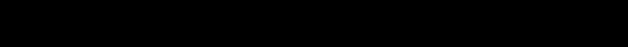

In [5]:
import  pandas  as pd

weather_df=pd.read_csv("D:\\BaiduNetdiskDownload\\05_尚硅谷大模型技术之Numpy&Pandas\\2.资料\\data\\weather.csv")
weather_df.dtypes   ## 查看字段类型
weather_df['month']=pd.to_datetime(weather_df['date']).dt.month
weather_df.groupby('month')[['temp_max','temp_min']].max()

,temp_max,temp_min
month,,
1,17.2,11.1
2,16.7,10.0
3,20.6,11.1
4,27.8,10.6
5,30.6,13.9
6,33.9,18.3
7,35.0,18.3
8,35.6,18.3
9,33.9,17.2


### 常用排序函数

In [14]:
# nlargest(n, [列名1, 列名2, …])：按列排序的最大n个
# nsmallest(n, [列名1, 列名2, …])：按列排序的最小n个
# sort_values([列名1, 列名2, …], asceding=[True, False, …])：按列升序或降序排序
# drop_duplicates(subset=[列名1, 列名2])：按列去重

weather_df.nlargest(10,['temp_max','temp_min'])   ## 返回的是df
# 通过nlargest()找出temp_min最小的5条数据。
weather_df.nlargest(30, "temp_max").nsmallest(5, "temp_min")

weather_df.sort_values(['precipitation'],ascending=False)


,date,precipitation,temp_max,temp_min,wind,weather,month
1169,2015/3/15,55.9,10.6,6.1,4.2,rain,3
1437,2015/12/8,54.1,15.6,10.0,6.2,rain,12
323,2012/11/19,54.1,13.3,8.3,6.0,rain,11
1413,2015/11/14,47.2,9.4,6.1,4.5,rain,11
794,2014/3/5,46.7,15.6,10.6,3.9,rain,3
...,...,...,...,...,...,...,...
66,2012/3/7,0.0,8.9,-1.7,2.7,sun,3
63,2012/3/4,0.0,10.6,6.7,5.6,rain,3
62,2012/3/3,0.0,12.2,6.7,7.0,sun,3
60,2012/3/1,0.0,6.1,1.1,3.1,sun,3


### 简单数据分析练习

In [87]:
import pandas as pd
employees_df=pd.read_csv('D:\\BaiduNetdiskDownload\\05_尚硅谷大模型技术之Numpy&Pandas\\2.资料\\data\\employees.csv')

## 一、基础数据查看与筛选

## 1）查看 DataFrame 的前 5 行数据
employees_df.head()
## 2）查看 DataFrame 的后 5 行数据
employees_df.tail()
## 3）查看数据的行数和列数
employees_df.info
## 4）查看每一列的数据类型
employees_df.dtypes
## 5）查看是否存在缺失值
employees_df.isnull().sum()>0          # 会统计处每一列的为null汇总
## 6）统计每一列缺失值的数量
employees_df.isnull().sum()          # 会统计处每一列的为null汇总
## 7）查看员工的 employee_id、salary 两列
employees_df[['employee_id','salary']]
## 8）找出薪资大于 10000 的员工
employees_df[employees_df['salary']>20000]
### 重点  ，这个是会返回整行，首先通过判断bool条件，返回True,Flase, 在取出满足bool条件的整行
employees_df.loc[employees_df['salary'] > 20000, 'first_name']



## 9）找出部门 employee_id 为 50 的所有员工
employees_df.loc[employees_df['employee_id']==106,'last_name']

## 10）找出没有部门 ID 的员工
employees_df.loc[employees_df['employee_id'].isnull(),'first_name']


##
## 二、排序与统计分析
##
## 11）按薪资从低到高排序员工信息
employees_df.sort_values(['salary'],ascending=True)
## 12）按薪资从高到低排序员工信息
employees_df.sort_values(['salary'],ascending=False)
## 13）找出薪资最低的 3 名员工
employees_df.nsmallest(3,'salary')
## 14）找出薪资最高的 5 名员工
employees_df.nlargest(5,'salary')
employees_df.nlargest(5,'salary').loc[employees_df['salary']>20000]
## 15）计算薪资的最大值、最小值
employees_df['salary'].max()
employees_df['salary'].min()
## 16）计算薪资的平均值、中位数
employees_df['salary'].mean()
employees_df['salary'].median()
## 17）计算薪资的标准差、方差
employees_df['salary'].std()
employees_df['salary'].var()
## 18）统计不同薪资区间的员工数量
##
## 三、分组（groupby）练习（重点）
##
## 19）统计每个部门的员工人数
employees_df.groupby('department_id')['employee_id'].count()


## 20）统计每个部门的平均薪资
employees_df.groupby('department_id')['salary'].mean()
## 21）统计每个部门的最高薪资
employees_df.groupby('department_id')['salary'].max()
## 22）统计每个部门的最低薪资
employees_df.groupby('department_id')['salary'].min()
## 23）找出平均薪资最高的部门
employees_df.groupby('department_id')['salary'].mean().nlargest(1)
## 24）找出员工人数最多的部门
employees_df.groupby('department_id')['employee_id'].count().nlargest(1)
## 25）统计每个部门薪资总和
employees_df.groupby('department_id')['salary'].sum()
## 26）统计每个部门薪资的标准差
employees_df.groupby('department_id')['salary'].std()


## 四、去重、唯一值、频次统计
##
## 27）查看所有部门 ID（去重）
employees_df['department_id'].drop_duplicates()
employees_df['department_id'].unique()
## 28）统计每个部门 ID 出现的次数

## 29）查看职位（job_id）的种类数量
employees_df['job_id'].unique()
## 30）统计每个职位的员工人数
employees_df.groupby('job_id')['employee_id'].count()


job_id
AC_ACCOUNT     1
AC_MGR         1
AD_ASST        1
AD_PRES        1
AD_VP          2
FI_ACCOUNT     5
FI_MGR         1
HR_REP         1
IT_PROG        5
MK_MAN         1
MK_REP         1
PR_REP         1
PU_CLERK       5
PU_MAN         1
SA_MAN         5
SA_REP        30
SH_CLERK      20
ST_CLERK      20
ST_MAN         5
Name: employee_id, dtype: int64